In [12]:
# Loading the data 
import pathlib
import tensorflow as tf 
import glob
import os

In [13]:
filename = glob.glob('/Desktop/AKOA_Analysis/'+"/*/*.png")
filename = glob.glob("/Users/xinjin/Desktop/AKOA_Analysis/*.png")
# Get the list of path names that match pathname,
filename[-5:]

['/Users/xinjin/Desktop/AKOA_Analysis/OAI9766889_BaseLine_4_de3d1_SAG_3D_DESS_WE_LEFT.nii.gz_16.png',
 '/Users/xinjin/Desktop/AKOA_Analysis/OAI9718992_BaseLine_3de3d1_SAG_3D_DESS_WE_RIGHT.nii.gz_4.png',
 '/Users/xinjin/Desktop/AKOA_Analysis/OAI9501369_BaseLine_3_de3d1_SAG_3D_DESS_WE_LEFT.nii.gz_36.png',
 '/Users/xinjin/Desktop/AKOA_Analysis/OAI9844581_BaseLine_5_de3d1_SAG_3D_DESS_WE_LEFT.nii.gz_2.png',
 '/Users/xinjin/Desktop/AKOA_Analysis/OAI9728094_BaseLine_4_de3d1_SAG_3D_DESS_WE_RIGHT.nii.gz_0.png']

In [14]:
len(filename) # Total number of image is 18680 

18680

# Spliting data into Train set and Test Set 

In [15]:
import random 
random.shuffle(filename)
filename[-5:]

['/Users/xinjin/Desktop/AKOA_Analysis/OAI9581241_BaseLine_4_de3d1_SAG_3D_DESS_WE_R_I_G_H_T.nii.gz_12.png',
 '/Users/xinjin/Desktop/AKOA_Analysis/OAI9896743_BaseLine_100de3d1_SAG_3D_DESS_WE_RIGHT.nii.gz_29.png',
 '/Users/xinjin/Desktop/AKOA_Analysis/OAI9364232_BaseLine_6_de3d1_SAG_3D_DESS_WE_RIGHT.nii.gz_5.png',
 '/Users/xinjin/Desktop/AKOA_Analysis/OAI9396994_BaseLine_3de3d1_SAG_3D_DESS_WE_LEFT.nii.gz_12.png',
 '/Users/xinjin/Desktop/AKOA_Analysis/OAI9633861_BaseLine_6_de3d1_SAG_3D_DESS_WE_RIGHT.nii.gz_27.png']

In [16]:
# Spliting data into 60%Train data and 20% Testing data and 20% Validation data
val_size = int(len(filename) * 0.2)
test_size = int(len(filename) * 0.2)
total_train_size = int(len(filename) * 0.6)

In [17]:
val_images = filename[:val_size] # Separate the files into three difference data sets 
test_images = filename[val_size:val_size+test_size]
train_images = filename[val_size+test_size:]

# Extract the labels 

In [18]:
test_images[1].split(os.path.sep)[-1].split("_")[-2].split(".")[0]

'RIGHT'

In [19]:
# Put data into data sets and remove the data with label T
train_labels = []
train_image = []
val_labels = []
val_image =[]
test_image =[]
test_labels = []
for fn in train_images:
    current_label = fn.split(os.path.sep)[-1].split("_")[-2].split(".")[0].upper()
    if(current_label  != 'T'):
        train_labels.append(current_label)
        train_image.append(fn)
        
for fn in val_images:
    current_label = fn.split(os.path.sep)[-1].split("_")[-2].split(".")[0].upper()
    if(current_label  != 'T'):
        val_labels.append(current_label)
        val_image.append(fn)
for fn in test_images:
    current_label = fn.split(os.path.sep)[-1].split("_")[-2].split(".")[0].upper()
    if(current_label  != 'T'):
        test_labels.append(current_label)
        test_image.append(fn)
train_images = train_image 
val_images = val_image
test_images = test_image

In [20]:
for i in range(5):
    print("Train_data ",test_images[i], "Val Label:",test_labels[i] )

Train_data  /Users/xinjin/Desktop/AKOA_Analysis/OAI9633861_BaseLine_101_de3d1_SAG_3D_DESS_WE_RIGHT.nii.gz_9.png Val Label: RIGHT
Train_data  /Users/xinjin/Desktop/AKOA_Analysis/OAI9824005_BaseLine_3_de3d1_SAG_3D_DESS_WE_RIGHT.nii.gz_15.png Val Label: RIGHT
Train_data  /Users/xinjin/Desktop/AKOA_Analysis/OAI9896743_BaseLine_5_de3d1_SAG_3D_DESS_WE_RIGHT.nii.gz_18.png Val Label: RIGHT
Train_data  /Users/xinjin/Desktop/AKOA_Analysis/OAI9700206_BaseLine_3de3d1_SAG_3D_DESS_WE_LEFT.nii.gz_28.png Val Label: LEFT
Train_data  /Users/xinjin/Desktop/AKOA_Analysis/OAI9819744_BaseLine_101_de3d1_SAG_3D_DESS_WE_RIGHT.nii.gz_6.png Val Label: RIGHT


In [21]:
class_name = sorted(set(test_labels)) # get the class names 
class_name

['LEFT', 'RIGHT']

In [22]:
# Creating train data set 
train_ds = tf.data.Dataset.from_tensor_slices((train_images,train_labels))
val_ds = tf.data.Dataset.from_tensor_slices((val_images,val_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_images,test_labels))

In [23]:
for image, labels in val_ds.take(5):
          print("Images",image.numpy())
          print("Label", labels.numpy())

Images b'/Users/xinjin/Desktop/AKOA_Analysis/OAI9867315_BaseLine_3_de3d1_SAG_3D_DESS_WE_RIGHT.nii.gz_36.png'
Label b'RIGHT'
Images b'/Users/xinjin/Desktop/AKOA_Analysis/OAI9849372_BaseLine_5_de3d1_SAG_3D_DESS_WE_LEFT.nii.gz_26.png'
Label b'LEFT'
Images b'/Users/xinjin/Desktop/AKOA_Analysis/OAI9747255_BaseLine_101_de3d1_SAG_3D_DESS_WE_LEFT.nii.gz_16.png'
Label b'LEFT'
Images b'/Users/xinjin/Desktop/AKOA_Analysis/OAI9331053_BaseLine_3_de3d1_SAG_3D_DESS_WE_RIGHT.nii.gz_31.png'
Label b'RIGHT'
Images b'/Users/xinjin/Desktop/AKOA_Analysis/OAI9331053_BaseLine_100_de3d1_SAG_3D_DESS_WE_RIGHT.nii.gz_2.png'
Label b'RIGHT'


In [24]:
train_ds = train_ds.shuffle(len(train_images))
val_ds = val_ds.shuffle(len(val_images))
test_ds = test_ds.shuffle(len(test_images))

In [25]:
def map_fn(filename, label):
    img = tf.io.read_file(filename)
    img = tf.io.decode_png(img,channels = 1)
    img  = tf.image.resize(img,(256,256))
    img = tf.cast(img, tf.float32)/255.0
    one_hot = label== class_name
    return img, one_hot
train_ds = train_ds.map(map_fn)
val_ds = val_ds.map(map_fn)
test_ds = test_ds.map(map_fn)

In [26]:
# Visualise the data 
image_batch, label_batch = next(iter(train_ds.batch(9)))
image_batch.numpy().shape

(9, 256, 256, 1)

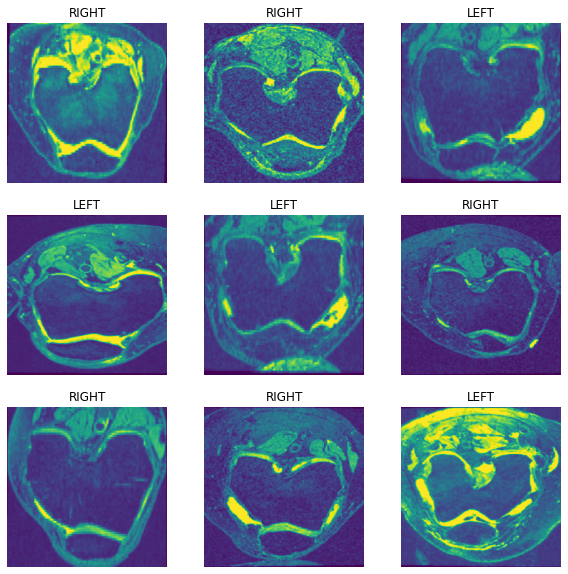

In [27]:
import matplotlib.pyplot as plt # Show the example graph
plt.figure(figsize = (10, 10))
for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(image_batch[i])
        label = tf.argmax(label_batch[i])
        plt.title(class_name[label])
        plt.axis("off")
        
plt.show()

# Model

In [44]:

class Model(tf.keras.Model):
    '''
        The model of the CNN which contains 2 Convolutional Neural Network and one flatten layers and a dense layers as 
        the output layers
        :Params: Model: Model of the NN 
    '''
    def __init__(self):
        super(Model,self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(16, 1,input_shape=(256,256,1), activation = 'relu') 
        self.conv2 = tf.keras.layers.Conv2D(32, 1,input_shape=(256,256,1),activation = 'relu')
        self.flatten = tf.keras.layers.Flatten()
        self.outputLayer = tf.keras.layers.Dense(2,activation = 'softmax')

    def call(self, x):
        '''
        Calls the neural networks 
        :Param: Data 
        :Retrun the resuult of the predicted data
        '''
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.flatten(x)
        return self.outputLayer(x)
model = Model()
# Adam is optimizer and categorical_crossentropy is Loss function 
model.compile(optimizer='adam', loss= 'categorical_crossentropy',metrics = ['accuracy'])
history = model.fit(train_ds.batch(8),
                    validation_data =val_ds.batch(32)
                    ,epochs = 5)

Epoch 1/5
1364/1364 [==============================] - 153s 113ms/step - loss: 0.1133 - accuracy: 0.9814 - val_loss: 0.0067 - val_accuracy: 0.9970
Epoch 2/5
1364/1364 [==============================] - 155s 113ms/step - loss: 0.0193 - accuracy: 0.9943 - val_loss: 0.0378 - val_accuracy: 0.9871
Epoch 3/5
1364/1364 [==============================] - 1093s 801ms/step - loss: 0.0029 - accuracy: 0.9993 - val_loss: 5.0727e-04 - val_accuracy: 0.9997
Epoch 4/5
1364/1364 [==============================] - 161s 118ms/step - loss: 2.7479e-05 - accuracy: 1.0000 - val_loss: 2.9622e-04 - val_accuracy: 0.9997
Epoch 5/5
1364/1364 [==============================] - 162s 119ms/step - loss: 1.0024e-05 - accuracy: 1.0000 - val_loss: 2.0615e-04 - val_accuracy: 0.9997


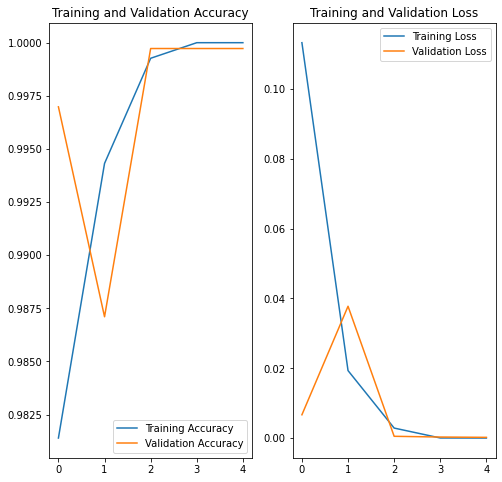

In [46]:
# Show the graph of the our accuracy and loss result
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(5)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [48]:
# Return The accuracy of test data sets 
test_loss, test_acc = model.evaluate(test_ds.batch(8), verbose=2)

456/456 - 10s - loss: 1.2994e-05 - accuracy: 1.0000
